<a href="https://colab.research.google.com/github/joestrada1022/ASL_CNN_Model/blob/main/ASL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal:
Our project goal is to use a **CNN** (Convolutional Neural Network) to predict the translations of **American Sign Language**.


### Initialization (Run First)

In [57]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2, os, gdown
from google.colab.patches import cv2_imshow #Makes the opencv image display compatible with Jupyter Notebook
from pathlib import Path




In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model, load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [59]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import mediapipe as mp
from PIL import Image as PILImage

## Section 1: Dataset Discovery and Processing

In [ ]:
#Loading the combined dataset
input_filename = "sign_mnist.csv"

# Replace 'file_id' with the ID of your file
file_id = '1NcoMkiEMX3fpPQMcTqsqKSJ1TQczvsVS'
if not os.path.isfile(input_filename):
  # Downloading the file
  gdown.download('https://drive.google.com/uc?id=' + file_id, input_filename, quiet=False)

### **Data Discovery**

In [ ]:
dataset = pd.read_csv('sign_mnist.csv')

print("First 5 values in the dataset:\n" , dataset.head())
print("\nLast 5 values in the dataset:\n" ,dataset.tail())
print("\nSummary of the data:")
print(dataset.info())
print("\nStatistical summary of the data:\n" ,dataset.describe())
print("\n Shape of the dataset:", dataset.shape)

First 5 values in the dataset:
    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784 

### **Handling Missing values in the dataset**

In [ ]:
#NaN values in the dataset ?
nan = dataset.isnull().sum()
print(nan[nan != 0])

Series([], dtype: int64)


### **Analysing the dataset**

In [ ]:
#Analyse the pixels intensity values
subset_pixels = dataset.iloc[:, 1:] #Removes labels
subset_pixels.describe()

pixel1        pixel2        pixel3        pixel4        pixel5  \
count  34627.000000  34627.000000  34627.000000  34627.000000  34627.000000   
mean     145.857077    148.903226    151.677824    153.984983    156.616600   
std       41.839313     40.355637     39.355866     38.762706     37.252215   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      122.000000    126.000000    130.000000    133.000000    137.000000   
50%      151.000000    154.000000    156.000000    158.000000    160.000000   
75%      175.000000    177.000000    179.000000    180.000000    181.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  34627.000000  34627.000000  34627.000000  34627.000000  34627.000000   
mean     158.904121    160.847171    162.610911    164.293384    165.901868   
std       36.130753     35.274594     34.137995     32.882325     31.514255   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      140.000000    143.000000    145.000000    146.000000    148.000000   
50%      163.000000    164.000000    166.000000    167.000000    168.000000   
75%      182.000000    184.000000    185.000000    185.000000    186.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  34627.000000  34627.000000  34627.000000  34627.000000   
mean   ...    140.574985    147.090479    152.791261    158.403211   
std    ...     63.914830     65.438124     64.713282     64.112086   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     91.500000     96.000000    102.000000    110.000000   
50%    ...    142.000000    161.000000    172.000000    179.000000   
75%    ...    196.000000    202.000000    205.000000    207.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  34627.000000  34627.000000  34627.000000  34627.000000  34627.000000   
mean     161.332140    162.097063    161.923528    161.077136    160.211309   
std       64.055046     63.886450     64.166570     63.892399     64.395504   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      118.000000    122.000000    124.000000    124.000000    124.000000   
50%      183.000000    183.000000    183.000000    182.000000    182.000000   
75%      208.000000    207.000000    207.000000    206.000000    205.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  34627.00000  
mean     158.77919  
std       65.25230  
min        0.00000  
25%      121.00000  
50%      181.00000  
75%      204.00000  
max      255.00000  

[8 rows x 784 columns]

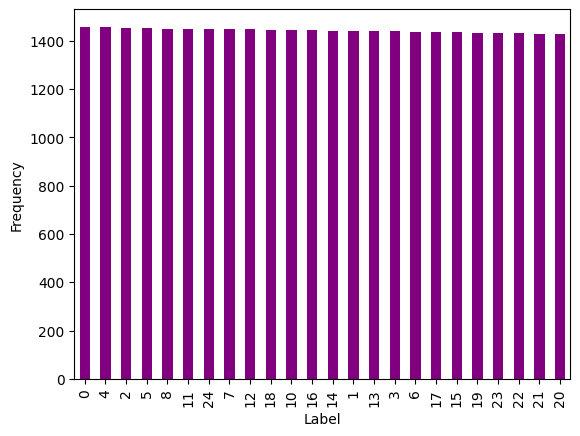

In [ ]:
#Distribution of the digits in the dataset
_ = dataset['label'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def display_digits(start_index, end_index, dataset):
    """
    Displays handwritten digit images from the dataset
    within the specified range [start_index, end_index].
    """

    images = np.arange(start_index, end_index)  # Setting the range

    subset_images = dataset.iloc[images, :]  # Selects images within that range
    subset_images.index = range(1, end_index - start_index + 1)  # Resets index of subset images to start at 1
    labels = subset_images['label'].values  # Get labels of the selected images
    subset_images.drop(columns=['label'], inplace=True)  # Dropping column from the dataframe

    num_images = end_index - start_index
    rows = (num_images // 8) + 1

    # Converts pixel data to image data
    for i, row in subset_images.iterrows():
        plt.subplot(rows, 8, i)
        pixels = row.values.reshape((28, 28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.title(f"{labels[i-1]}")  # Display label next to each image

    plt.show()


<ipython-input-11-8d6c981fcf1e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_images.drop(columns=['label'], inplace=True)  # Dropping column from the dataframe


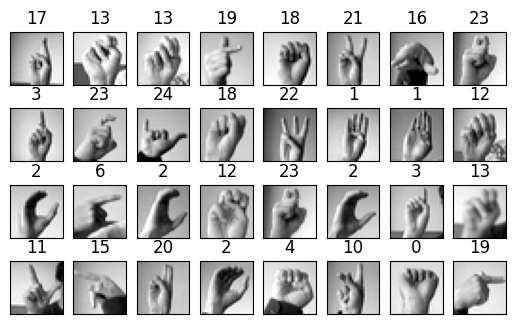

In [ ]:
display_digits(16, 48, dataset)

### **Splitting the dataset into training, validating and testing datasets proportionally**

In [ ]:
#Initializing target Value/label array and poupulating it with 0 through 25(exclusive) to represent our labels
target_values =  list(range(0, 25))

# Initialize empty dictionaries to store the splits
train_splits = {target: None for target in target_values}
valid_splits = {target: None for target in target_values}
test_splits = {target: None for target in target_values}

# Split the data for each target value
for target in target_values:
    target_data = dataset[dataset['label'] == target]
    train_splits[target] = target_data.sample(frac=0.7)
    valid_splits[target] = target_data.sample(frac=0.1)
    test_splits[target] = target_data.sample(frac=0.2)

# Extract the resulting data splits for each target value
train = pd.concat([train_splits[target] for target in target_values])
val = pd.concat([valid_splits[target] for target in target_values])
test = pd.concat([test_splits[target] for target in target_values])

# #Converting the files to a csv type
# train.to_csv("trainingDataASL.csv", index=False, float_format="%.5f")
# val.to_csv("validatingDataASL.csv", index=False, float_format="%.5f")
# test.to_csv("testingDataASL.csv", index=False, float_format="%.5f")

Split data files stored under content folder


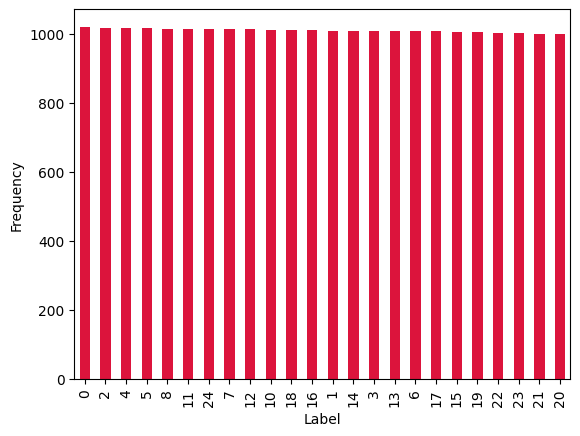

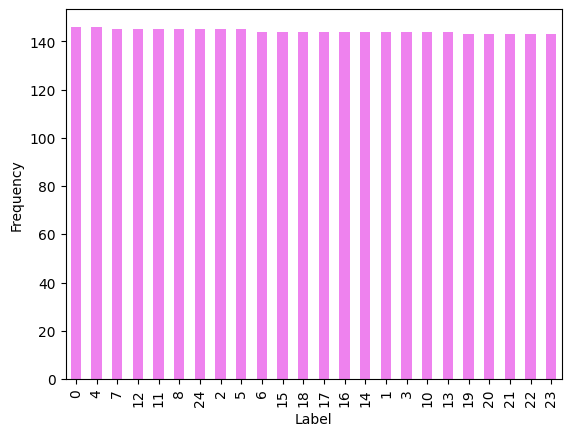

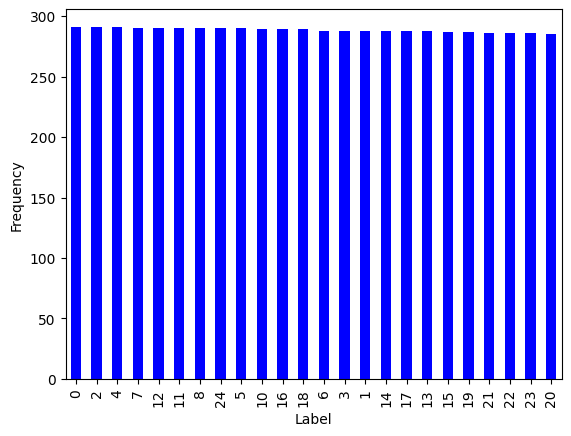

In [ ]:
#Distribution of the digits in the training dataset
_ = train['label'].value_counts().plot(kind = 'bar', color = 'crimson')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

#Distribution of the digits in the validating dataset
_ = val['label'].value_counts().plot(kind = 'bar', color = 'violet')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

#Distribution of the digits in the testing dataset
_ = test['label'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

## **Scaling/Reshaping the dataset**


In [17]:
#Loading the training and validating datasets

trainFile = "trainingDataASL.csv"
trainID = '1ktLoOffkeEN4H92KsTLpMV_tnh1rMXOg'
if not os.path.isfile(trainFile):
  # Downloading the file
  gdown.download('https://drive.google.com/uc?id=' + trainID, trainFile, quiet=False)

# validateFile = "validatingDataASL.csv"
# validateID = '1lA-Qz3d0PMkPDaqoetzqOO_DLX8nCdXk'
# if not os.path.isfile(validateFile):
#   # Downloading the file
#   gdown.download('https://drive.google.com/uc?id=' + validateID, validateFile, quiet=False)

testFile = "testingDataASL.csv"
testID = '1Dbh5eXSRVr8OVDohQbybqyuriIqLjIQ1'
if not os.path.isfile(testFile):
  # Downloading the file
  gdown.download('https://drive.google.com/uc?id=' + testID, testFile, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ktLoOffkeEN4H92KsTLpMV_tnh1rMXOg
To: /content/trainingDataASL.csv
100%|██████████| 83.3M/83.3M [00:02<00:00, 38.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Dbh5eXSRVr8OVDohQbybqyuriIqLjIQ1
To: /content/testingDataASL.csv
100%|██████████| 21.8M/21.8M [00:00<00:00, 74.7MB/s]


In [18]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
def prepare_dataset(data: pd.DataFrame):

  data_label = data['label']
  data_values = data.drop(['label'], axis=1)

  # Reshape dataset to fit into CNN
  X_data = data_values.values
  X_data = data_values.values.reshape(-1, 28, 28, 1)

  # Normalize pixel intensity to 0-1
  X_data = X_data / 255.0

  # One-hot encode labels
  Y_data = lb.fit_transform(data_label)

  return X_data, Y_data



In [19]:
trainData = pd.read_csv('trainingDataASL.csv')
xTrain, yTrain = prepare_dataset(trainData)
print(xTrain.shape, yTrain.shape)

testData = pd.read_csv('testingDataASL.csv')
xTest, yTest = prepare_dataset(testData)
print(xTest.shape, yTest.shape)

# valData = pd.read_csv('validatingDataASL.csv')
# xVal, yVal = prepare_dataset(valData)
# print(xVal.shape, yVal.shape)

(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


## TensorFlow CNN Model


In [ ]:
model = Sequential()

# Add convolution layers, relu, and maxpooling
model.add(Conv2D(128, kernel_size=(5,5), strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(3,3), strides=2))

model.add(Conv2D(64, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Conv2D(32, kernel_size=(2,2), strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Flatten output for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.15))

# Output layer
model.add(Dense(units=24, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 32)          0

In [ ]:
# compile model
'''
- Using adam optimizer because adam adjusts the learning rate during training
- Using crossentropy because...
'''
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# data batch
train_generator = ImageDataGenerator(rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [ ]:
model.fit(train_generator.flow(xTrain, yTrain, batch_size=128),
          epochs=27, validation_data=(xTest, yTest),
          shuffle=1
          )

Epoch 1/27
215/215 [==============================] - 92s 424ms/step - loss: 2.9804 - accuracy: 0.0875 - val_loss: 2.5762 - val_accuracy: 0.1829
Epoch 2/27
215/215 [==============================] - 83s 384ms/step - loss: 2.4371 - accuracy: 0.2207 - val_loss: 1.8723 - val_accuracy: 0.3744
Epoch 3/27
215/215 [==============================] - 80s 374ms/step - loss: 2.0556 - accuracy: 0.3334 - val_loss: 1.4388 - val_accuracy: 0.5383
Epoch 4/27
215/215 [==============================] - 82s 383ms/step - loss: 1.7799 - accuracy: 0.4129 - val_loss: 1.3746 - val_accuracy: 0.5178
Epoch 5/27
215/215 [==============================] - 82s 383ms/step - loss: 1.5853 - accuracy: 0.4714 - val_loss: 1.0884 - val_accuracy: 0.6478
Epoch 6/27
215/215 [==============================] - 83s 384ms/step - loss: 1.4135 - accuracy: 0.5260 - val_loss: 0.9766 - val_accuracy: 0.6520
Epoch 7/27
215/215 [==============================] - 78s 362ms/step - loss: 1.2872 - accuracy: 0.5650 - val_loss: 0.8967 - val_ac

In [ ]:
# save for future use
model.save("model.keras")

In [33]:
#Loading the combined dataset
input_filename = "model.keras"
# Replace 'file_id' with the ID of your file
file_id = '1ih1ohHh4mzggN1bzz_YIwDmj2_0J39Ci'
if not os.path.isfile(input_filename):
  # Downloading the file
  gdown.download('https://drive.google.com/uc?id=' + file_id, input_filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ih1ohHh4mzggN1bzz_YIwDmj2_0J39Ci
To: /content/model.keras
100%|██████████| 1.42M/1.42M [00:00<00:00, 48.0MB/s]


In [34]:
model = load_model('model.keras')

In [ ]:
(testing_loss, testing_accuracy)=model.evaluate(xTest,yTest,batch_size=128)
print(f"Testing Loss: {testing_loss:.4f}, Testing Accuracy: {testing_accuracy:.4f}")
print('MODEL ACCURACY = {}%'.format(testing_accuracy*100))

57/57 [==============================] - 6s 102ms/step - loss: 0.2631 - accuracy: 0.9021
Testing Loss: 0.2631, Testing Accuracy: 0.9021
MODEL ACCURACY = 90.21193385124207%


In [ ]:
def get_prediction(img_path, model, lb):
    letter_labels = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        10: 'K',
        11: 'L',
        12: 'M',
        13: 'N',
        14: 'O',
        15: 'P',
        16: 'Q',
        17: 'R',
        18: 'S',
        19: 'T',
        20: 'U',
        21: 'V',
        22: 'W',
        23: 'X',
        24: 'Y',
    }

    # Load and preprocess the image
    img_show = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Normalize the image

    # Predict the gesture
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions[0])

    predicted_label = lb.classes_[class_idx]


    plt.imshow(img_show, cmap='gray')
    plt.title(f'Predicted label: {letter_labels[predicted_label]}')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
    print(os.path.basename(img_path))

In [80]:
def predict_gesture(frame, coords, model, lb):
    letter_labels = {
        0: 'A',
        1: 'B',
        2: 'C',
        3: 'D',
        4: 'E',
        5: 'F',
        6: 'G',
        7: 'H',
        8: 'I',
        10: 'K',
        11: 'L',
        12: 'M',
        13: 'N',
        14: 'O',
        15: 'P',
        16: 'Q',
        17: 'R',
        18: 'S',
        19: 'T',
        20: 'U',
        21: 'V',
        22: 'W',
        23: 'X',
        24: 'Y',
    }


    # grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    # crop to bounding box
    x1, y1, x2, y2 = coords
    w = x2 - x1
    h = y2 - y1
    gray = gray[y1:y1 + h, x1:x1 + w]
    # cv2_imshow(gray)

    # reshape
    gray = cv2.resize(gray, (28,28))

    # Create batch
    img_array = np.expand_dims(gray, axis=0)

    img_array = img_array.astype(np.float32) / 255.0


    # Predict the gesture
    predictions = model.predict(img_array, verbose=0)
    class_idx = np.argmax(predictions[0])

    predicted_label = lb.classes_[class_idx]
    return letter_labels[predicted_label]

# Testing Outputs

In [ ]:
Path("/content/test_cases").mkdir(exist_ok=True)
output = '/content/test_cases'

folder_id = '1Bct7K3Fi2gY_NIyjFnfGOb97SoB2Cz7f'
gdown.download_folder(id=folder_id, output=output, quiet=False)


Retrieving folder contents


Processing file 1x6VKNol9m26x6QyoBac44zdcJ6facVps letterA.jpg
Processing file 1UaPZbKk7kpOr1A93-IonJoiX0DkS7p7o letterB.jpg
Processing file 1bNpVZcEcBEDtt5fyBC_Ha2JX-Sg26sp5 letterC.jpg
Processing file 1QenDjlgzF6drSQsl2Lr_ABoJ2G7XO1XS letterD.jpg
Processing file 1arb8JKaMREF4fBnja8kIYdN7gLEGC7x6 letterE.jpg
Processing file 15IM3EnLiNIpwKuDz3dt-ax7xldQAja8V letterF.jpg
Processing file 1JlnC7Wicdw-8zVNh-CBB1VrcLMNzxc5Z letterG.jpg
Processing file 1GX9j6hVHUEm7758oF7iH73IY2DuXr1iW LetterH.jpg
Processing file 1zh-c6NxC-7obgLxGZ0_m4GPhMa32oaN- letterI.jpg
Processing file 1R_kfc_fcIWIIL2U5PFBeNJzEHVOyWNVj letterK.jpg
Processing file 1tMU2Tpspm-CZjGoFoWh8yjq6v4_a4SnK letterL.jpg
Processing file 1pBv440917P-x-che3oRme4_9KrNlCHjg letterM.jpg
Processing file 1zcSSAwB2kdAnwxVuM7SP06TrvKosGawn letterN.jpg
Processing file 1Gfn71g9CRtmkhpvmyzFwrQYch_TGJaHJ LetterO.jpg
Processing file 1GdGfc90xXN2dUSVRL_7YDzTZ8-TyxyJf LetterP.jpg
Processing file 1Gc2wgCJ5NIdoaTwZc1J_DpyWRp2xVCh3 LetterQ.jpg
Processi

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1x6VKNol9m26x6QyoBac44zdcJ6facVps
To: /content/test_cases/letterA.jpg
100%|██████████| 721k/721k [00:00<00:00, 93.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UaPZbKk7kpOr1A93-IonJoiX0DkS7p7o
To: /content/test_cases/letterB.jpg
100%|██████████| 750k/750k [00:00<00:00, 95.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bNpVZcEcBEDtt5fyBC_Ha2JX-Sg26sp5
To: /content/test_cases/letterC.jpg
100%|██████████| 778k/778k [00:00<00:00, 85.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QenDjlgzF6drSQsl2Lr_ABoJ2G7XO1XS
To: /content/test_cases/letterD.jpg
100%|██████████| 816k/816k [00:00<00:00, 87.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1arb8JKaMREF4fBnja8kIYdN7gLEGC7x6
To: /content/test_cases/letterE.jpg
100%|██████████| 621k/621k [00:00<00:00, 11.2MB/s]
Downloading...
From: https://d

['/content/test_cases/letterA.jpg',
 '/content/test_cases/letterB.jpg',
 '/content/test_cases/letterC.jpg',
 '/content/test_cases/letterD.jpg',
 '/content/test_cases/letterE.jpg',
 '/content/test_cases/letterF.jpg',
 '/content/test_cases/letterG.jpg',
 '/content/test_cases/LetterH.jpg',
 '/content/test_cases/letterI.jpg',
 '/content/test_cases/letterK.jpg',
 '/content/test_cases/letterL.jpg',
 '/content/test_cases/letterM.jpg',
 '/content/test_cases/letterN.jpg',
 '/content/test_cases/LetterO.jpg',
 '/content/test_cases/LetterP.jpg',
 '/content/test_cases/LetterQ.jpg',
 '/content/test_cases/LetterR.jpg',
 '/content/test_cases/LetterS.jpg',
 '/content/test_cases/LetterT.jpg',
 '/content/test_cases/LetterU.jpg',
 '/content/test_cases/LetterV.jpg',
 '/content/test_cases/LetterW.jpg',
 '/content/test_cases/LetterX.jpg',
 '/content/test_cases/LetterY.jpg']

1/1 [==============================] - 0s 361ms/step


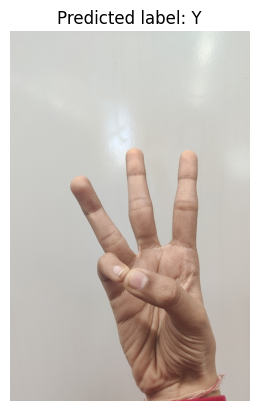

LetterW.jpg
1/1 [==============================] - 0s 46ms/step


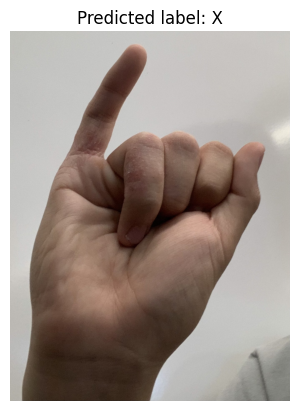

letterI.jpg
1/1 [==============================] - 0s 39ms/step


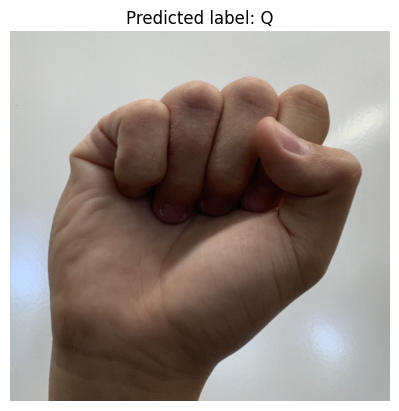

letterE.jpg
1/1 [==============================] - 0s 33ms/step


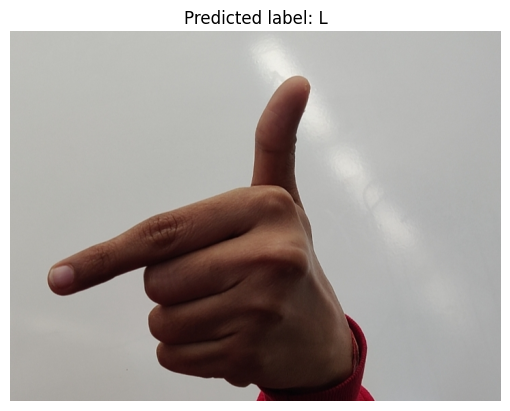

LetterT.jpg
1/1 [==============================] - 0s 51ms/step


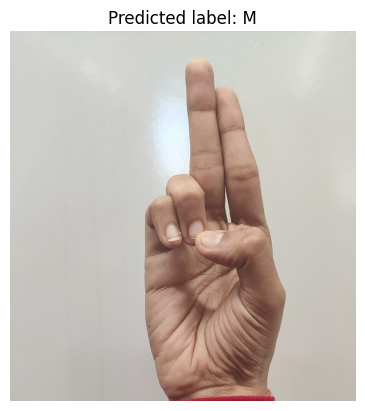

LetterU.jpg
1/1 [==============================] - 0s 54ms/step


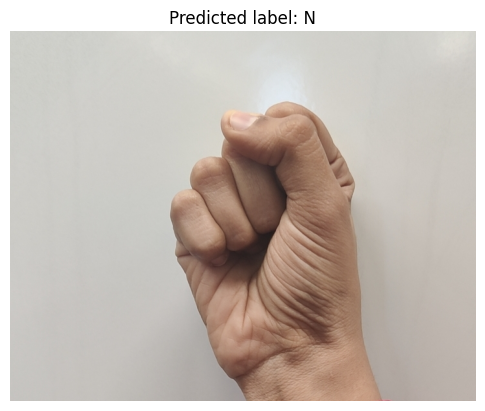

LetterS.jpg
1/1 [==============================] - 0s 68ms/step


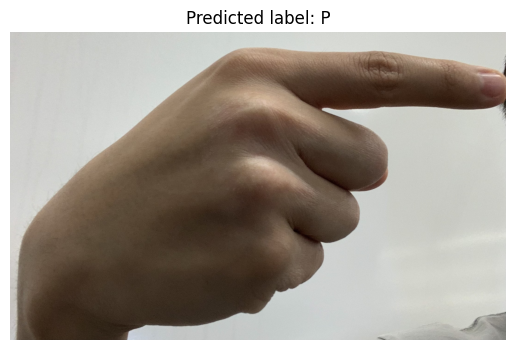

letterG.jpg
1/1 [==============================] - 0s 20ms/step


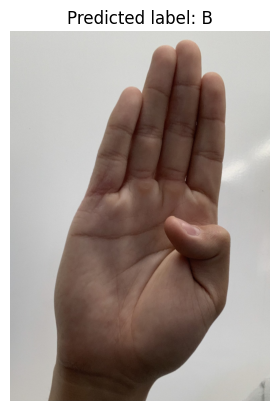

letterB.jpg
1/1 [==============================] - 0s 21ms/step


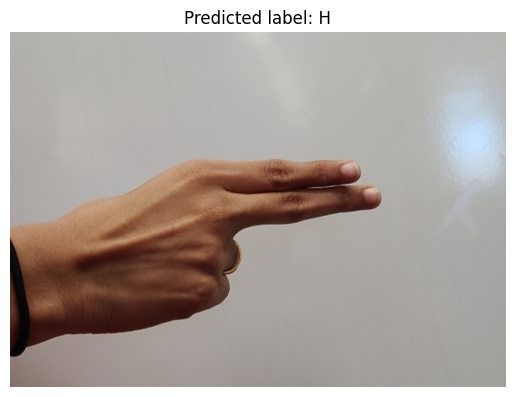

LetterH.jpg
1/1 [==============================] - 0s 22ms/step


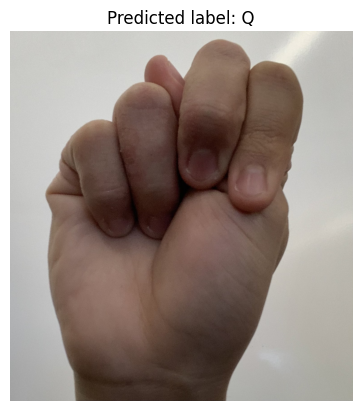

letterN.jpg
1/1 [==============================] - 0s 20ms/step


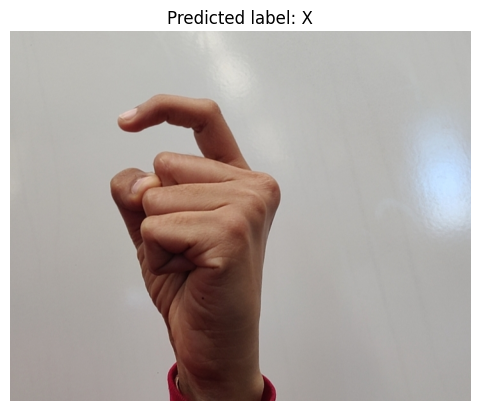

LetterX.jpg
1/1 [==============================] - 0s 31ms/step


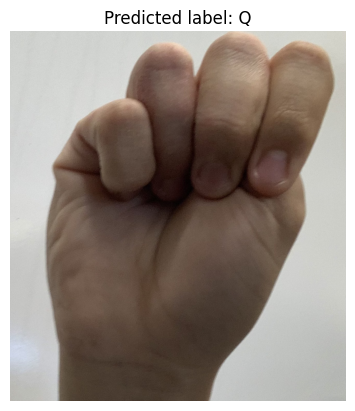

letterM.jpg
1/1 [==============================] - 0s 24ms/step


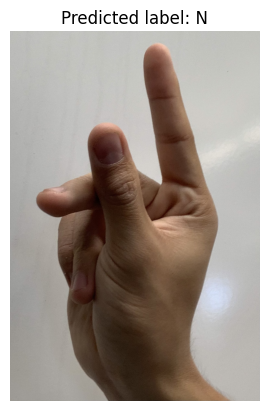

letterK.jpg
1/1 [==============================] - 0s 20ms/step


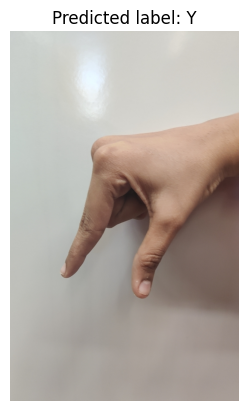

LetterQ.jpg
1/1 [==============================] - 0s 27ms/step


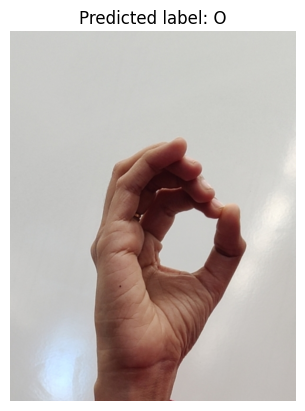

LetterO.jpg
1/1 [==============================] - 0s 20ms/step


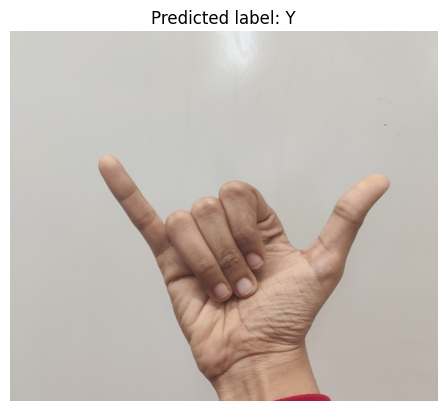

LetterY.jpg
1/1 [==============================] - 0s 22ms/step


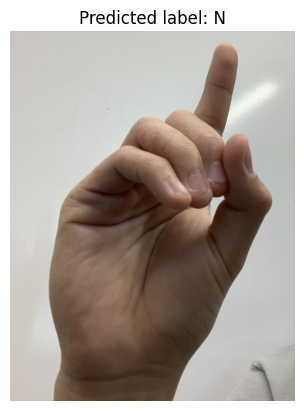

letterD.jpg
1/1 [==============================] - 0s 21ms/step


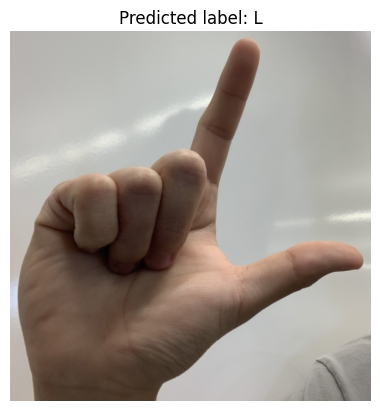

letterL.jpg
1/1 [==============================] - 0s 33ms/step


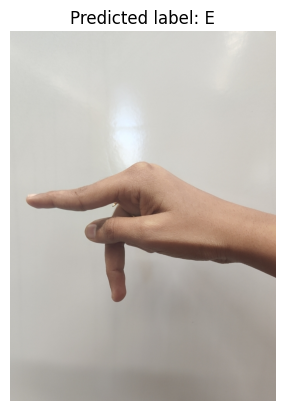

LetterP.jpg
1/1 [==============================] - 0s 22ms/step


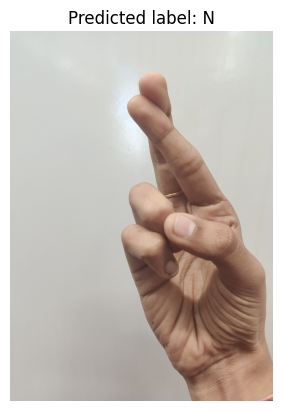

LetterR.jpg
1/1 [==============================] - 0s 27ms/step


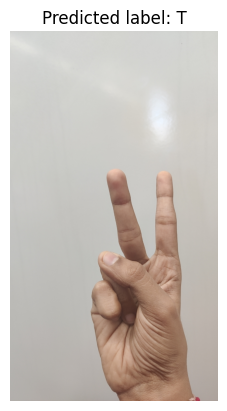

LetterV.jpg
1/1 [==============================] - 0s 26ms/step


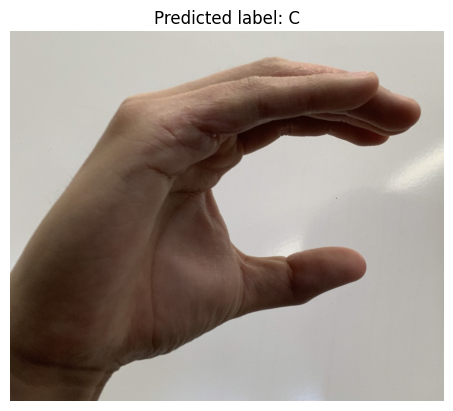

letterC.jpg
1/1 [==============================] - 0s 28ms/step


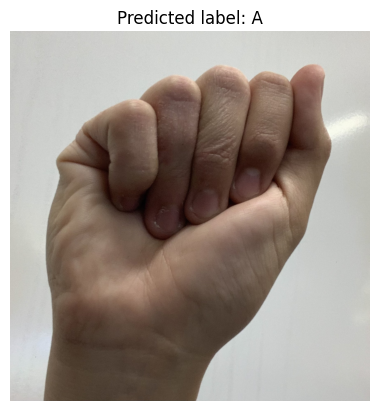

letterA.jpg
1/1 [==============================] - 0s 21ms/step


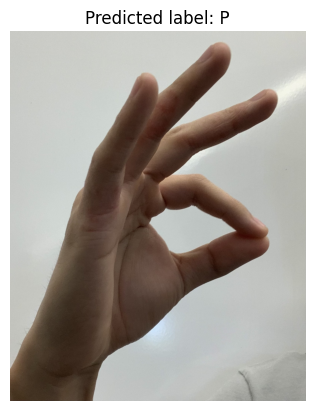

letterF.jpg


In [ ]:
for filename in os.listdir("/content/test_cases"):
    image_path = os.path.join("/content/test_cases", filename)
    get_prediction(image_path, model, lb)


# Live Video Input

### Helper Functions

In [20]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [21]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

### Camera Feed

In [82]:
# start streaming video from webcam
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    result = hands.process(img)
    hand_landmarks = result.multi_hand_landmarks

    if hand_landmarks:
        for handLMs in hand_landmarks:
            h = 480
            w = 640
            padding = 20
            # Initialize variables for bounding box coordinates
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h

            # Loop through each hand landmark
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)

                # Update min and max coordinates
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y

                x1 = x_min - 2 * padding
                y1 = y_min - padding
                x2 = x_max + 2 * padding
                y2 = y_max + padding
                coords = (x1, y1, x2, y2)

            # Draw the bounding box
            letter = predict_gesture(img, coords, model, lb)
            bbox_array = cv2.rectangle(bbox_array, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(bbox_array, letter, (x1 + 10, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>